In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Phase 1: Exploratory Data Analysis

Note that this is the data preprocessing, it involves a data set that is larger than 100MB so it cannot be uploaded to github. However, we have the preprocessed data for phase 2.



In [81]:
# Import the crime data from Baltimore Police department
df = pd.read_csv("Part1_Crime_Beta.csv")

<ipython-input-81-1b554c33b759>:2: DtypeWarning: Columns (5,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Part1_Crime_Beta.csv")


In [82]:
# Convert time column to pandas datatime
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], errors='coerce')
# Filter out Data from Oct 2024 for training
df = df[df.CrimeDateTime > '2016-01-01']

<ipython-input-82-eb9972b8f006>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], errors='coerce')


In [83]:
# Import the crime code data from Baltimore Police department
crime_code = pd.read_csv("CRIME_CODES.csv")
crime_code

,CODE,TYPE,NAME,CLASS,NAME_COMBINE,WEAPON,VIOLENT_CR,VIO_PROP_CFS
0,13,CTYP,ASSIST OFFICER,CFS,ASSIST OFFICER,NaN,NaN,OTHER
1,1A,CTYP,MURDER,PART 1,HOMICIDE,OTHER,HOMICIDE,VIOLENT
2,1F,CTYP,MURDER,PART 1,HOMICIDE,FIREARM,HOMICIDE,VIOLENT
3,1K,CTYP,MURDER,PART 1,HOMICIDE,KNIFE,HOMICIDE,VIOLENT
4,1O,CTYP,MURDER,PART 1,HOMICIDE,OTHER,HOMICIDE,VIOLENT
...,...,...,...,...,...,...,...,...
198,BLNK,CTYP,NaN,NaN,NaN,NaN,NaN,OTHER
199,FI,CTYP,FIELD INTERVIEW,CFS,FIELD INTERVIEW,NaN,FIELD INTERVIEW,OTHER
200,RA,CTYP,REQUEST ASSISTANCE,CFS,REQUEST ASSISTANCE,NaN,NaN,OTHER
201,ZN,CTYP,FALSE ALARM,CFS,FALSE ALARM,NaN,NaN,PROPERTY


In [84]:
# Drop null values on relevant columns
# Join crime code and crime data on the common variable: "crime code"
df = df.merge(crime_code, left_on = 'CrimeCode', right_on = 'CODE', how = 'left')
# Only keep relevant columns
df = df[['CrimeDateTime',
 'CrimeCode',
 'Post',
 'Gender',
 'Race',
 'Latitude',
 'Longitude',
 'WEAPON',
 'VIOLENT_CR']]
# Show the data
df

,CrimeDateTime,CrimeCode,Post,Gender,Race,Latitude,Longitude,WEAPON,VIOLENT_CR
0,2023-12-10 15:45:00,6C,132.0,NaN,NaN,39.284331,-76.599621,NaN,LARCENY
1,2023-12-21 19:00:00,6C,511.0,NaN,NaN,39.332669,-76.635531,NaN,LARCENY
2,2023-12-03 01:00:00,7A,923.0,F,BLACK_OR_AFRICAN_AMERICAN,39.263218,-76.640693,NaN,AUTO THEFT
3,2023-12-10 18:25:00,6C,632.0,NaN,NaN,39.357757,-76.707476,NaN,LARCENY
4,2023-12-17 20:45:00,7A,124.0,F,BLACK_OR_AFRICAN_AMERICAN,39.299032,-76.603832,NaN,AUTO THEFT
...,...,...,...,...,...,...,...,...,...
400030,2016-08-15 02:00:00,5A,611.0,F,BLACK_OR_AFRICAN_AMERICAN,39.321147,-76.654871,NaN,BURGLARY
400031,2016-08-15 20:34:00,4E,224.0,M,WHITE,39.295726,-76.575856,HANDS,COMMON ASSAULT
400032,2016-08-15 07:00:00,7A,424.0,F,WHITE,39.363427,-76.551778,NaN,AUTO THEFT
400033,2016-08-15 15:00:00,7C,812.0,M,UNKNOWN,39.312266,-76.677217,NaN,AUTO THEFT


The data is extremely large and a lot of the crime data is too old to reflect status-quo of crimes in Baltimore now.

So we only investigate the crime data for October to November 2024

Output the preprocessed data for convenient further analysis
```
df.to_csv('preprocessed.csv', index=False)
```

In [85]:
# Read in the previous output
df = pd.read_csv("preprocessed.csv")
# Drop null values after joining
df = df.dropna(subset = ["VIOLENT_CR", "Latitude", "Longitude"])
# Restrict to past month data for training
df = df[df.CrimeDateTime > '2024-10-01']
# Sort the data in ascending time of occurrences
df = df.sort_values(by='CrimeDateTime', ascending=True)
df

<ipython-input-85-c74a2ca7bb70>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("preprocessed.csv")


,CrimeDateTime,CrimeCode,Post,Gender,Race,Latitude,Longitude,WEAPON,VIOLENT_CR
395653,2024-10-01 00:00:00,6F,214.0,M,UNKNOWN,39.294988,-76.568448,NaN,LARCENY
395654,2024-10-01 00:00:00,4E,935.0,M,WHITE,39.269554,-76.609358,HANDS,COMMON ASSAULT
395655,2024-10-01 00:00:00,4A,133.0,M,BLACK_OR_AFRICAN_AMERICAN,39.291748,-76.590004,FIREARM,AGG. ASSAULT
395656,2024-10-01 00:01:00,6J,122.0,M,BLACK_OR_AFRICAN_AMERICAN,39.295729,-76.615621,NaN,LARCENY
395657,2024-10-01 00:10:00,4E,712.0,F,BLACK_OR_AFRICAN_AMERICAN,39.307169,-76.636945,HANDS,COMMON ASSAULT
...,...,...,...,...,...,...,...,...,...
400030,2024-11-06 21:00:00,4E,321.0,M,WHITE,39.306118,-76.603628,HANDS,COMMON ASSAULT
400031,2024-11-06 21:30:00,4A,713.0,F,BLACK_OR_AFRICAN_AMERICAN,39.301315,-76.631996,FIREARM,AGG. ASSAULT
400032,2024-11-06 22:00:00,4E,621.0,M,BLACK_OR_AFRICAN_AMERICAN,39.338751,-76.687112,HANDS,COMMON ASSAULT
400033,2024-11-06 22:09:00,6J,233.0,M,BLACK_OR_AFRICAN_AMERICAN,39.287214,-76.554446,NaN,LARCENY


In [86]:
# Extract the coordinate data
X = pd.DataFrame(dict(Longitude = df['Longitude'], Latitude = df['Latitude']))
# Filter out irrelevant ones by limiting longitude and latitude within Baltimore city area
X = X[X['Latitude'] >= 39]
X = X[X['Longitude'] <= -76]
# Converting pandas dataframe to numpy array for k-means clustering is necessary
X = X.to_numpy()
X

array([[-76.568448  ,  39.294988  ],
       [-76.609358  ,  39.269554  ],
       [-76.5900041 ,  39.29174846],
       ...,
       [-76.687112  ,  39.338751  ],
       [-76.554446  ,  39.287214  ],
       [-76.564309  ,  39.291461  ]])

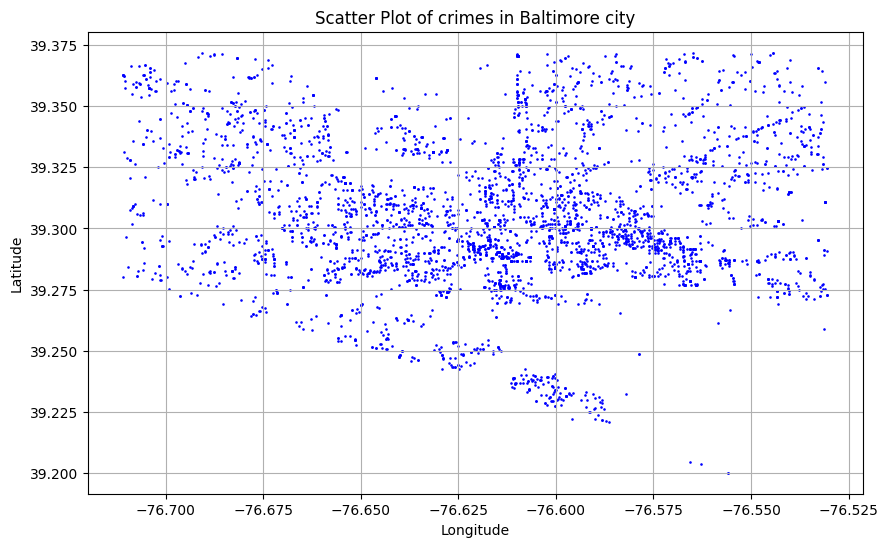

In [87]:
# Plot out the crimes, the shape of baltimore area is visible now
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', marker='.', s=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of crimes in Baltimore city")
plt.grid(True)
plt.show()

In [88]:
# Prepare for weights to be used in k-means
df["VIOLENT_CR"].value_counts(normalize=True)

,proportion
VIOLENT_CR,
LARCENY,0.363547
COMMON ASSAULT,0.248342
AGG. ASSAULT,0.147875
AUTO THEFT,0.122083
BURGLARY,0.079096
ROBBERY,0.026775
RAPE,0.008106
HOMICIDE,0.004176


In [89]:
mapping = {
    "LARCENY": 8,
    "COMMON ASSAULT": 79,
    "AGG. ASSAULT": 122,
    "ROBBERY": 148,
    "BURGLARY": 27,
    "AUTO THEFT": 4,
    "RAPE": 248,
    "HOMICIDE": 364
}

Y = df["VIOLENT_CR"].map(mapping)
Y

,VIOLENT_CR
395653,8
395654,79
395655,122
395656,8
395657,79
...,...
400030,79
400031,122
400032,79
400033,8


Phase 2: Fitting weighted k-means algorithm

In [91]:
# Preset colors for later plotting readability and consisitent
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]

In [92]:
# The complete k-means implementation
class KMeans:
    """
    KMeans clustering algorithm implementation with adaptation of different norms.

    Parameters:
        n_clusters (int): The number of clusters to form. Defaults to 7.
        max_iters (int): The maximum number of iterations for the algorithm. Defaults to 1000.

    Attributes:
        n_clusters (int): The number of clusters.
        max_iters (int): The maximum number of iterations.
        centroids (np.ndarray): The cluster centroids.
    """
    def __init__(self, data, n_clusters=7, max_iters=10000, p=2):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.centroids = None
        self.p = p
        self.X = data
        self.weight = np.ones(data.shape[0])
        self.is_weighted = False

    def lp_norm(self, a, b):
        """
        This is a general implementation of p-norm for customization of different distances
        """
        if self.p == 0:
            dim_1 = a.shape[0]
            dim_2 = b.shape[0]
            result_arr = np.zeros((dim_1,dim_2))
            for i in range(dim_1):
                #if i % 250 == 0:
                    #print(i, "out of", dim_1)
                for j in range(dim_2):
                    result_arr[i,j] = self.special_l2_norm(a[i,:],b[j,:])
            return result_arr
        return np.sum(np.abs(a[:, np.newaxis] - b) ** self.p, axis=2) ** (1 / self.p)

    def special_l2_norm(self, a, b):
        """
        The goal of this special l2 norm is to deal with crossing the Patapsco River
        a and b are vectors
        """
        left_entry = np.array([-76.6130291,39.2840638])
        right_entry = np.array([-76.5708041,39.2617970])

        left_entry_2 = np.array([-76.61569167970892, 39.25758272617812])
        right_entry_2 = np.array([-76.57230986911311, 39.254436078307656])

        sea_left = np.array([-76.611685,39.284058])
        sea_right = np.array([-76.571299,39.269252])
        sea_steps = [sea_left + (sea_right - sea_left) * i / 10 for i in range(11)]
        intersect_sea = False

        sea_left_2 = np.array([-76.6125136211996,39.25505195721421])
        sea_right_2 = np.array([-76.57644489577092,39.25559438497015])
        sea_steps_2 = [sea_left_2 + (sea_right_2 - sea_left_2) * i / 10 for i in range(11)]
        intersect_sea_2 = False

        sea_left_3 = np.array([-76.56827827906785,39.2523065238226])
        sea_right_3 = np.array([-76.52676365820307,39.214947336950694])
        sea_steps_3 = [sea_left_3 + (sea_right_3 - sea_left_3) * i / 10 for i in range(11)]
        intersect_sea_3 = False

        int_steps = [a + (b - a) * i / 100 for i in range(101)]
        for step in int_steps:
            for sea in sea_steps:
                if np.linalg.norm(step - sea) < 0.0001:
                    intersect_sea = True
                    break
            if intersect_sea:
                break
        for step in int_steps:
            for sea in sea_steps_2:
                if np.linalg.norm(step - sea) < 0.0001:
                    intersect_sea_2 = True
                    break
            if intersect_sea_2:
                break
        for step in int_steps:
            for sea in sea_steps_3:
                if np.linalg.norm(step - sea) < 0.0001:
                    intersect_sea_3 = True
                    break
            if intersect_sea_3:
                break

        if intersect_sea and (intersect_sea_2 or intersect_sea_3):
            return min([np.linalg.norm(a - left_entry) + np.linalg.norm(left_entry - left_entry_2) + np.linalg.norm(b - left_entry_2),
                        np.linalg.norm(a - right_entry) + np.linalg.norm(right_entry - right_entry_2) + np.linalg.norm(b - right_entry_2),
                        np.linalg.norm(b - left_entry) + np.linalg.norm(left_entry - left_entry_2) + np.linalg.norm(a - left_entry_2),
                        np.linalg.norm(b - right_entry) + np.linalg.norm(right_entry - right_entry_2) + np.linalg.norm(a - right_entry_2)])
        if intersect_sea:
            return min([np.linalg.norm(a - left_entry) + np.linalg.norm(left_entry - b),
                        np.linalg.norm(a - right_entry) + np.linalg.norm(right_entry - b)])
        if intersect_sea_2 or intersect_sea_3:
            return min([np.linalg.norm(a - left_entry_2) + np.linalg.norm(left_entry_2 - b),
                        np.linalg.norm(a - right_entry_2) + np.linalg.norm(right_entry_2 - b)])
        return np.linalg.norm(a - b)

    def add_weight(self, weight):
        self.weight = weight
        self.is_weighted = True

    def fit(self, tol=1e-4):
        np.random.seed(42)
        X = self.X
        n_samples, n_features = X.shape
        # Initialize centroids randomly from data points
        centroids = X[np.random.choice(n_samples, self.n_clusters, replace=False)]
        labels = np.zeros(n_samples, dtype=int)

        for iteration in range(self.max_iters):
            # Compute distances using L^p norm
            distances = self.lp_norm(X, centroids)

            # Assign labels based on closest centroid
            new_labels = np.argmin(distances, axis=1)

            # Compute new centroids
            new_centroids = np.array([
                np.average(X[new_labels == i], axis=0, weights=self.weight[new_labels == i]) if np.any(new_labels == i) else centroids[i]
                for i in range(self.n_clusters)
            ])

            # Check for convergence
            if np.all(np.abs(new_centroids - centroids) < tol):
                break

            centroids = new_centroids
            labels = new_labels
        return centroids, labels

    def get_centroids(self):
        if self.centroids is None:
            raise Exception("data not fit")
        return self.centroids

    def recluster(self, new_num = 3, title="K-means Clustering"):
        X = self.X
        centroids, labels = self.fit()
        plt.figure(figsize=(15, 10))
        for i in range(self.n_clusters):
            plt.scatter(centroids[i, 0], centroids[i, 1], color=colors[i], marker='o', alpha=0.5, s=300, label='Centroids')
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            new_kMeans = KMeans(cluster_points, p=self.p, n_clusters=new_num)
            new_centroids, new_labels = new_kMeans.fit()
            new_distances = new_kMeans.lp_norm(cluster_points, new_centroids)
            this_point = np.zeros((new_num,2))
            for j in range(new_num):
                this_point[j,:] = cluster_points[new_labels == j][np.argmax(new_distances[new_labels == j], axis=0)][0]
            plt.scatter(this_point[:, 0], this_point[:, 1], label=f'Cluster {i+1}', s=100, marker='x', c=colors[i])
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}', s=10, marker='.', c=colors[i], alpha = 0.5)
        str_weighted = "unweighted"
        if self.is_weighted:
            str_weighted = "weighted"
        title_string = title + ' with ' + f"L{self.p} of " + str(self.n_clusters) + " clusters with " + str_weighted + " maximum distance in sub-clustering marked with x"
        plt.title(title_string)
        plt.show()

    def recluster_print(self, new_num = 3, title="K-means Clustering"):
        X = self.X
        centroids, labels = self.fit()
        plt.figure(figsize=(15, 10))
        for i in range(self.n_clusters):
            plt.scatter(centroids[i, 0], centroids[i, 1], color=colors[i], marker='o', alpha=0.5, s=300, label='Centroids')
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            new_kMeans = KMeans(cluster_points, p=self.p, n_clusters=new_num)
            new_centroids, new_labels = new_kMeans.fit()
            new_distances = new_kMeans.lp_norm(cluster_points, new_centroids)
            this_point = np.zeros((new_num,2))
            for j in range(new_num):
                this_point[j,:] = cluster_points[new_labels == j][np.argmax(new_distances[new_labels == j], axis=0)][0]
                print("from", centroids[i,1], centroids[i,0], "to", this_point[j,1], this_point[j,0])
                print(
                # Print out google map link for checking driving time from police department to crime scene manually
                # Prepare for google map links for 3 subclustering centroids in the 7 cluster, ie, 21 distances to be checked
                # Each link has its own coordinate and that of its assigned centroids as input into google map
                f"https://www.google.com/maps/dir/{centroids[i,1]},{centroids[i,0]}/"
                f"{this_point[j,1]},{this_point[j,0]}/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!"
                f"2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D\n"
            )
            # Represent subcluster centroids by 'x'
            plt.scatter(this_point[:, 0], this_point[:, 1], label=f'Cluster {i+1}', s=100, marker='x', c=colors[i])
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}', s=10, marker='.', c=colors[i], alpha = 0.5)
        str_weighted = "unweighted"
        if self.is_weighted:
            str_weighted = "weighted"
        title_string = title + ' with ' + f"L{self.p} of " + str(self.n_clusters) + " clusters with " + str_weighted + " maximum distance in sub-clustering marked with x"
        plt.title(title_string)
        plt.show()

    def visualize(self, title="K-means Clustering"):
        """
        Visualizes the clustering results.

        Parameters:
            title (str): The title of the plot. Defaults to "K-means Clustering".
        """
        X = self.X
        centroids, labels = self.fit()
        plt.figure(figsize=(15, 10))
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}', s=10, marker='o')
        plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='o', alpha=0.5, s=300, label='Centroids')
        str_weighted = "unweighted"
        if self.is_weighted:
            str_weighted = "weighted"
        title_string = title + ' with ' + f"L{self.p} of " + str(self.n_clusters) + ' clusters, ' + str_weighted
        plt.title(title_string)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.legend()
        plt.show()

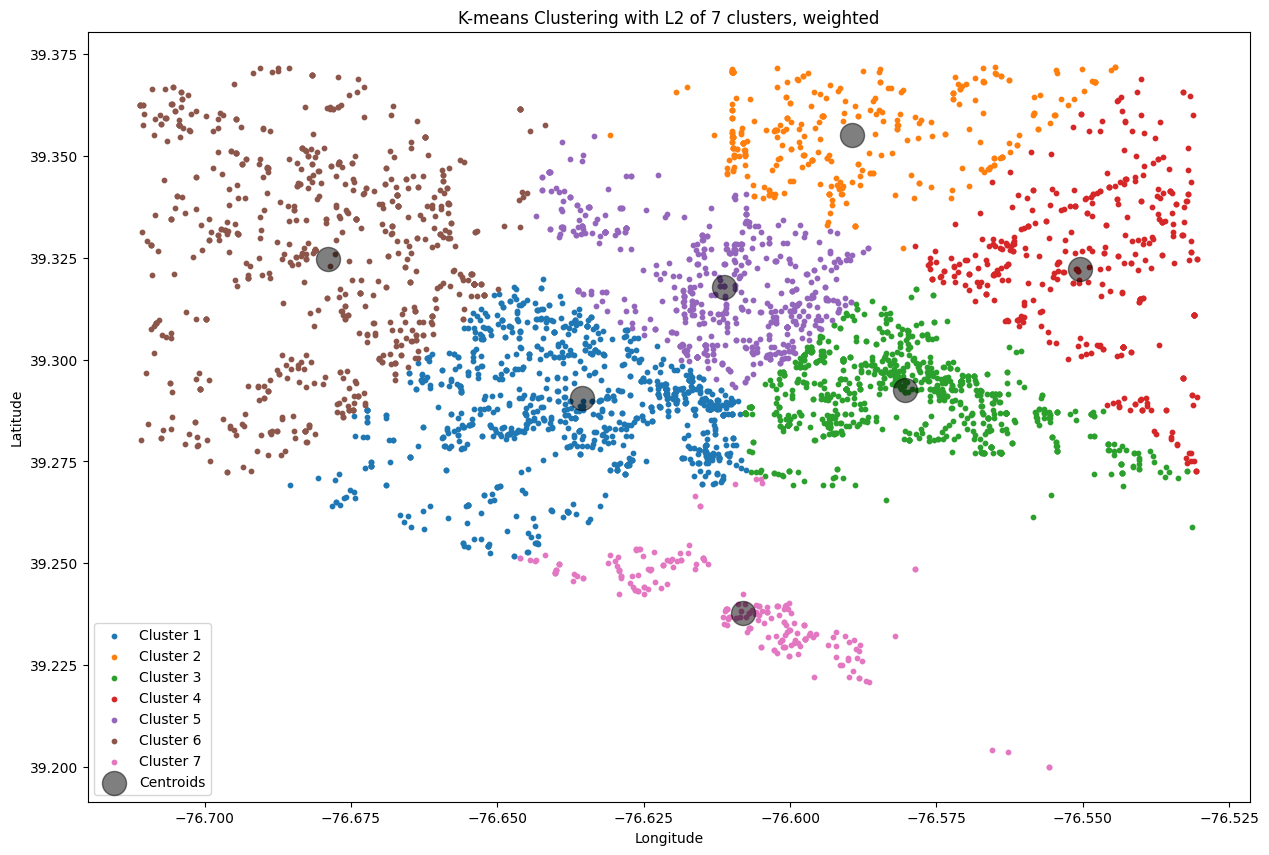

from 39.29054050335156 -76.63552663841391 to 39.264132 -76.632381
https://www.google.com/maps/dir/39.29054050335156,-76.63552663841391/39.264132,-76.632381/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.29054050335156 -76.63552663841391 to 39.269188 -76.685375
https://www.google.com/maps/dir/39.29054050335156,-76.63552663841391/39.269188,-76.685375/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.29054050335156 -76.63552663841391 to 39.296628 -76.665118
https://www.google.com/maps/dir/39.29054050335156,-76.63552663841391/39.296628,-76.665118/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.35503382491631 -76.5893834336295 to 39.355048 -76.630713
https://www.google.com/maps/dir/39.35503382491631,-76.58

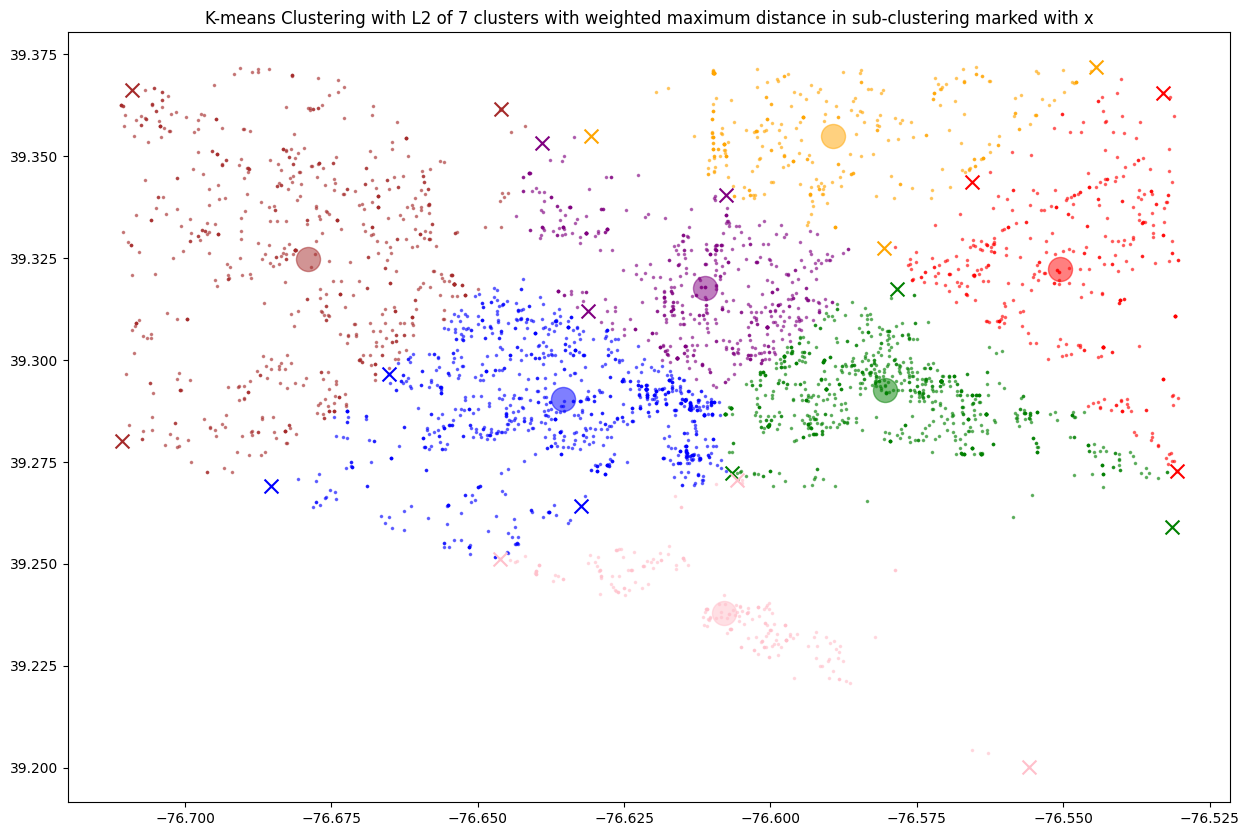

In [93]:
kmeans = KMeans(X, p=2, n_clusters=7)
kmeans.add_weight(Y)
kmeans.visualize()
kmeans.recluster_print()

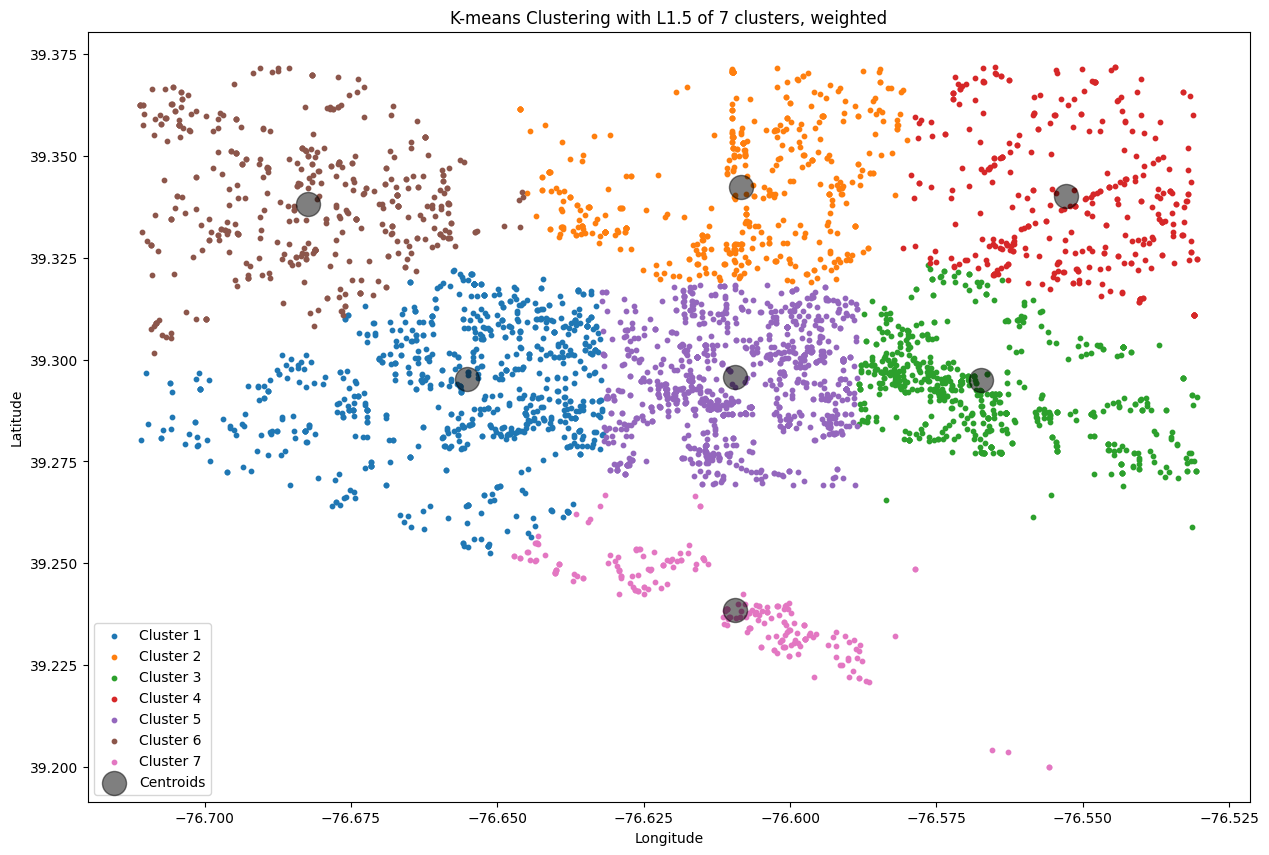

from 39.29517949287555 -76.65517800260511 to 39.313111 -76.672668
https://www.google.com/maps/dir/39.29517949287555,-76.65517800260511/39.313111,-76.672668/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.29517949287555 -76.65517800260511 to 39.25253 -76.651312
https://www.google.com/maps/dir/39.29517949287555,-76.65517800260511/39.25253,-76.651312/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.29517949287555 -76.65517800260511 to 39.280271 -76.710846
https://www.google.com/maps/dir/39.29517949287555,-76.65517800260511/39.280271,-76.710846/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.34230671750385 -76.60833023569613 to 39.361476 -76.646168
https://www.google.com/maps/dir/39.34230671750385,-76.608

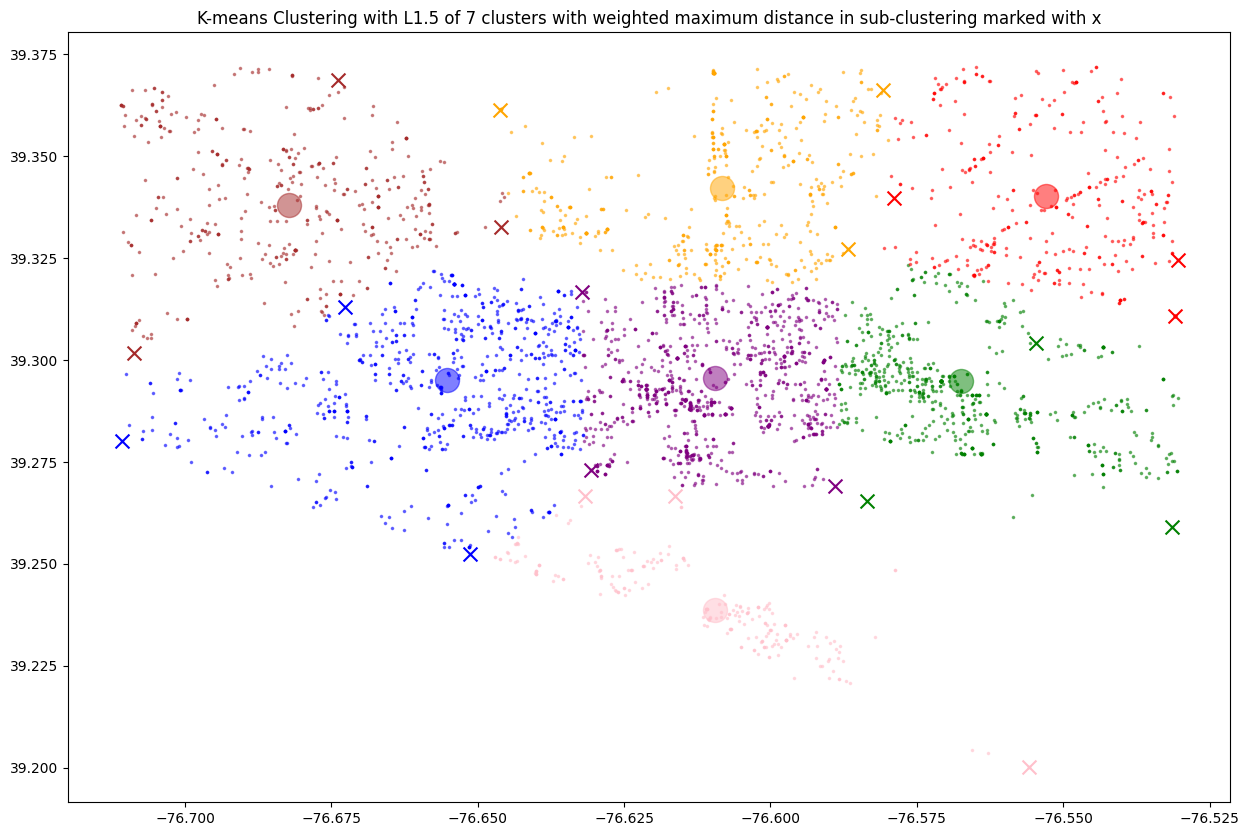

In [94]:
kmeans = KMeans(X, p=1.5, n_clusters=7)
kmeans.add_weight(Y)
kmeans.visualize()
kmeans.recluster_print()

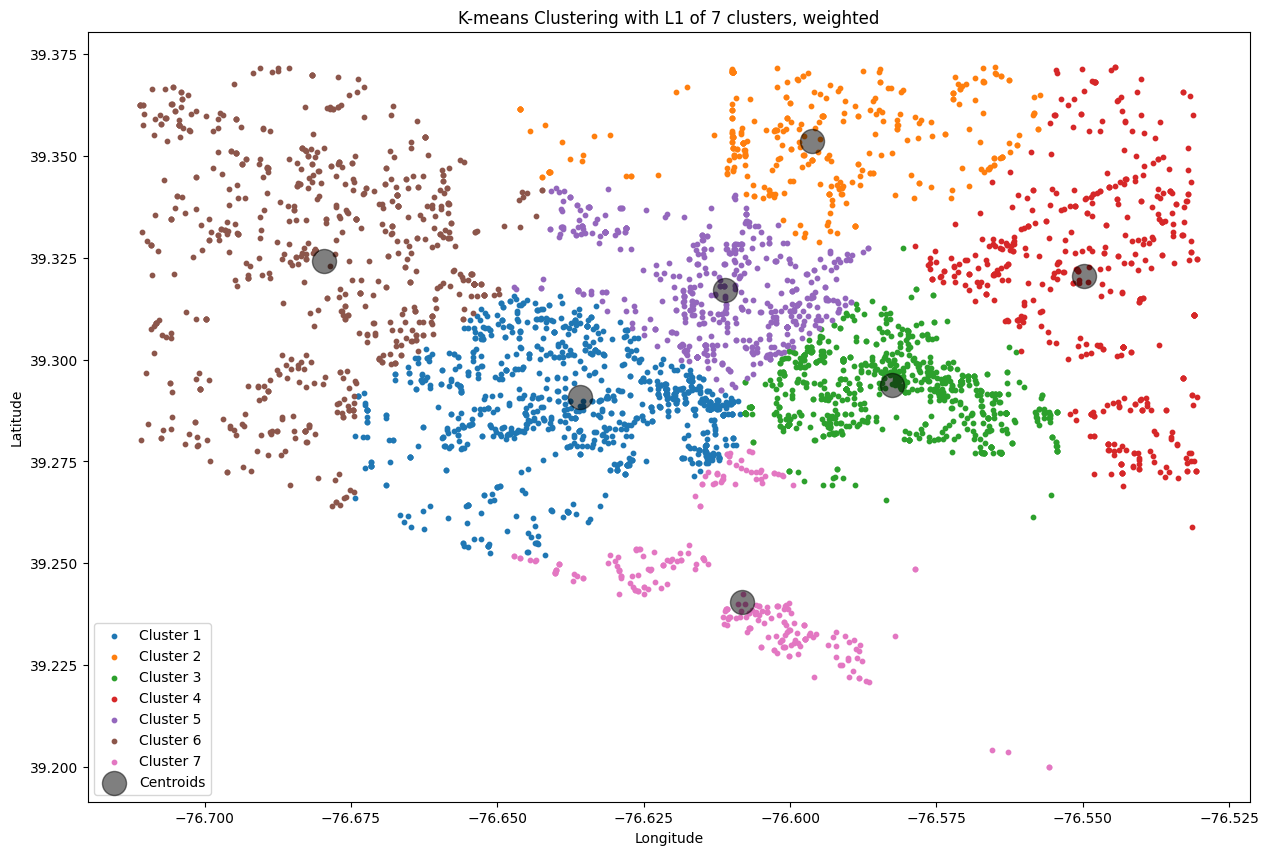

from 39.290863826319104 -76.635900172283 to 39.291061 -76.673749
https://www.google.com/maps/dir/39.290863826319104,-76.635900172283/39.291061,-76.673749/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.290863826319104 -76.635900172283 to 39.309296 -76.628978
https://www.google.com/maps/dir/39.290863826319104,-76.635900172283/39.309296,-76.628978/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.290863826319104 -76.635900172283 to 39.28972639614312 -76.60883145549766
https://www.google.com/maps/dir/39.290863826319104,-76.635900172283/39.28972639614312,-76.60883145549766/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.35358054633625 -76.59629599464571 to 39.361476 -76.646168
https://www.google.com/maps/d

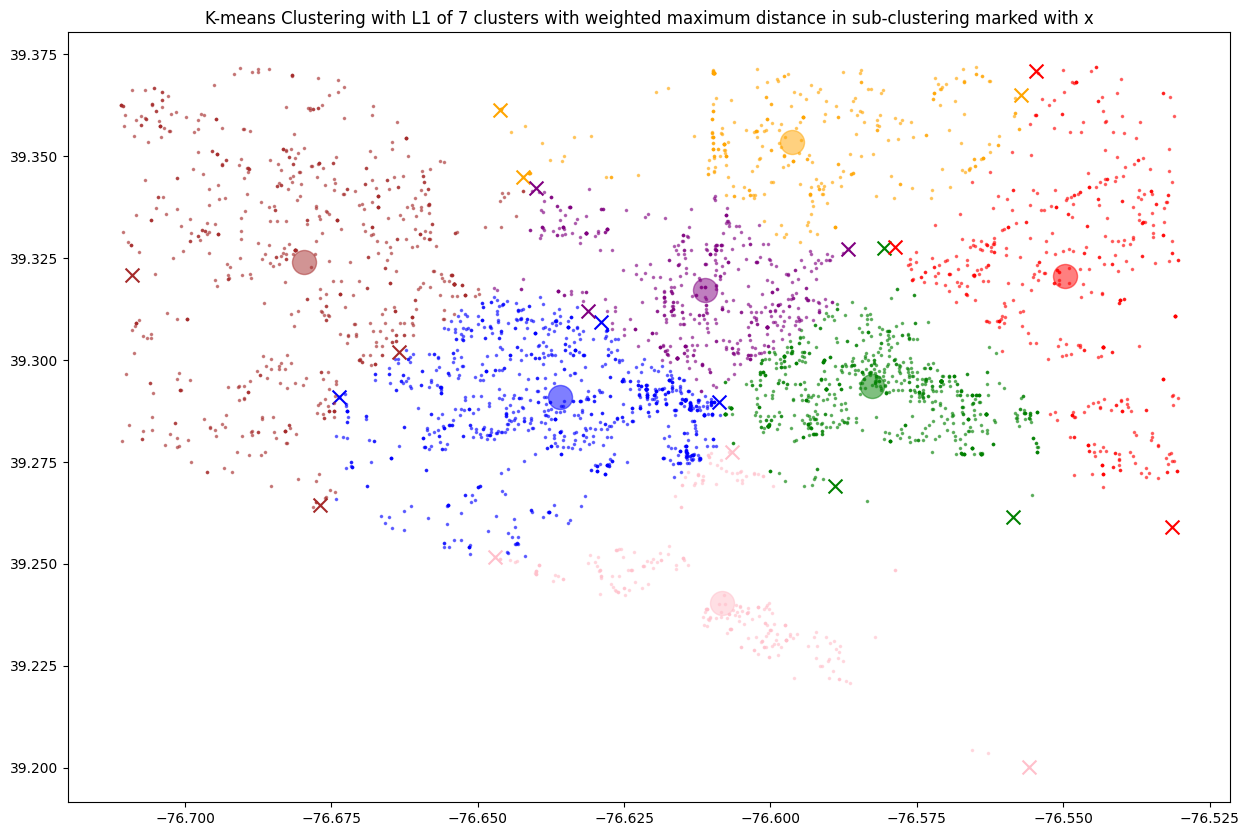

In [95]:
kmeans = KMeans(X, p=1, n_clusters=7)
kmeans.add_weight(Y)
kmeans.visualize()
kmeans.recluster_print()

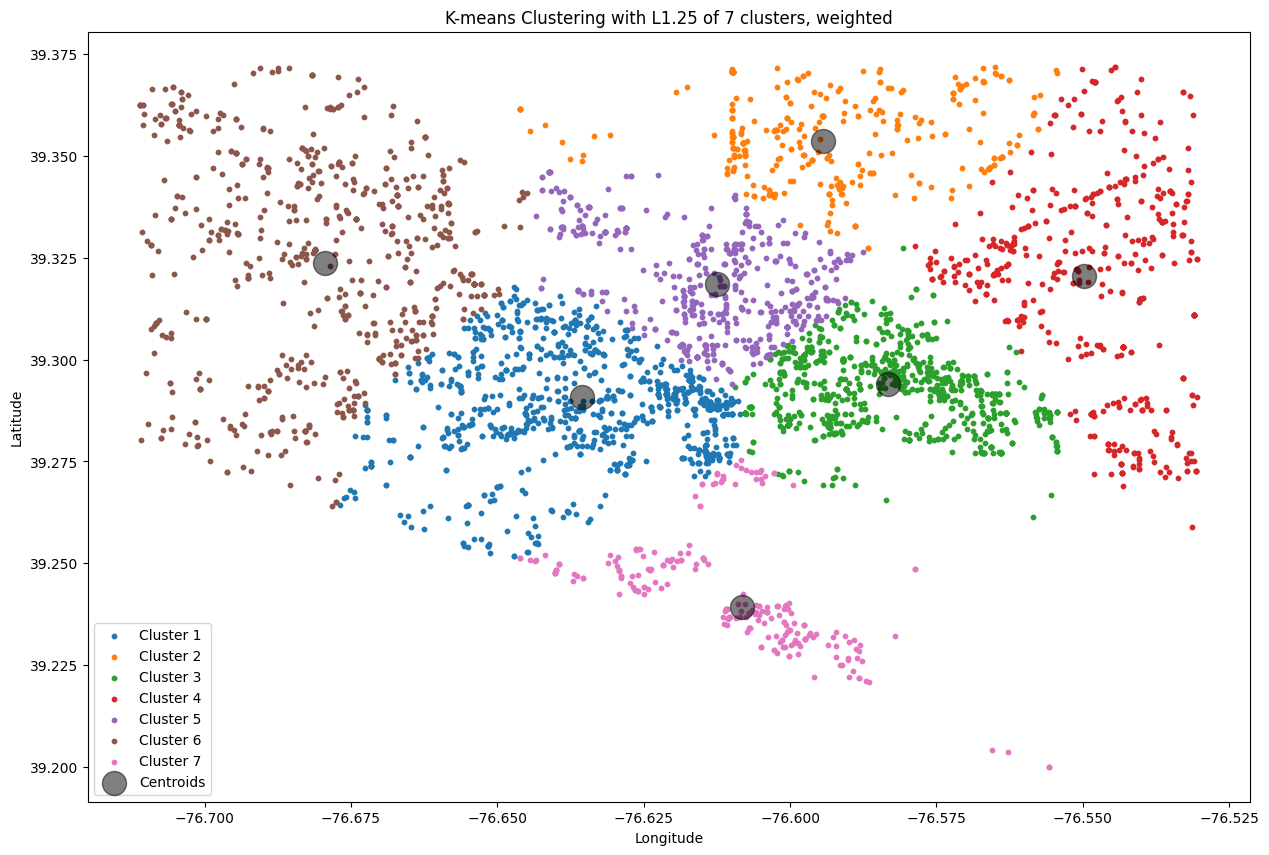

from 39.29072040913707 -76.63546474451134 to 39.266662 -76.631663
https://www.google.com/maps/dir/39.29072040913707,-76.63546474451134/39.266662,-76.631663/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.29072040913707 -76.63546474451134 to 39.264408 -76.676914
https://www.google.com/maps/dir/39.29072040913707,-76.63546474451134/39.264408,-76.676914/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.29072040913707 -76.63546474451134 to 39.298091 -76.665196
https://www.google.com/maps/dir/39.29072040913707,-76.63546474451134/39.298091,-76.665196/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.35374468814172 -76.59443086313668 to 39.371009 -76.554646
https://www.google.com/maps/dir/39.35374468814172,-76.5

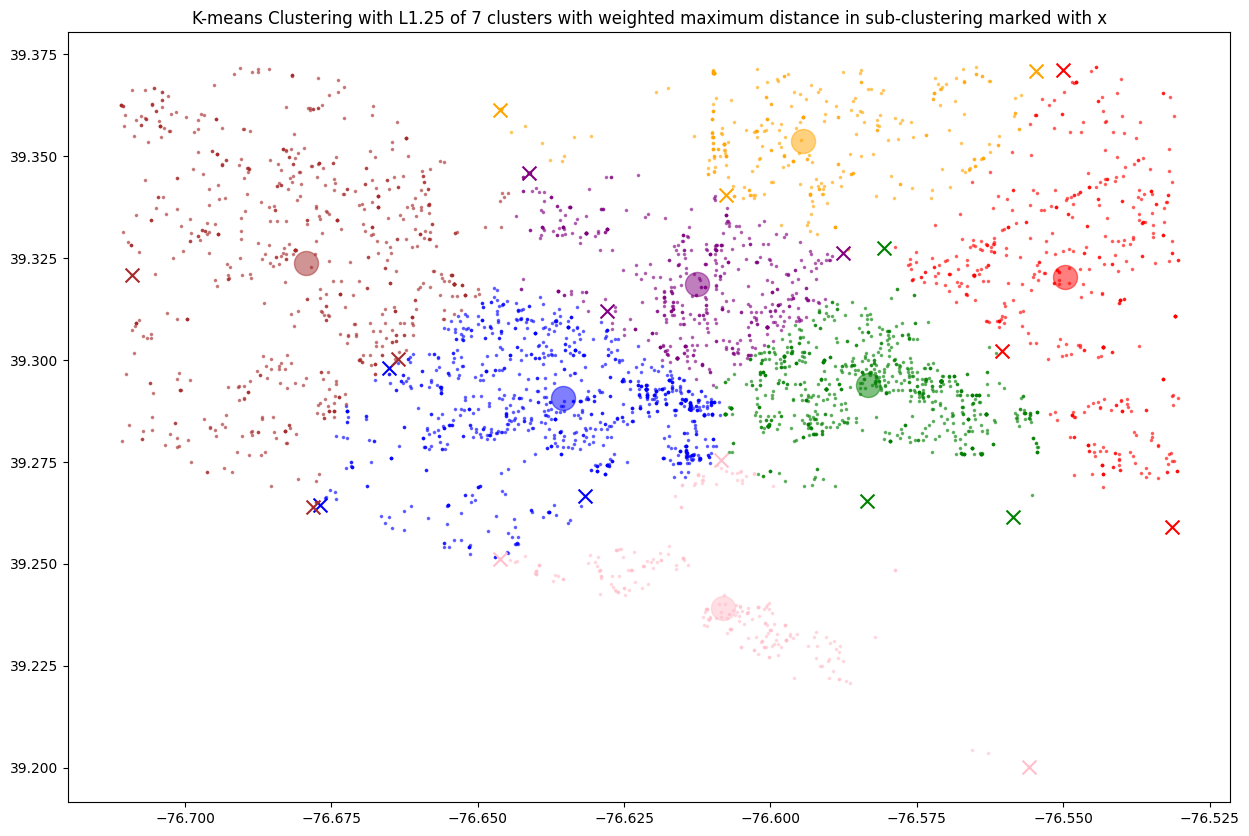

In [96]:
kmeans = KMeans(X, p=1.25, n_clusters=7)
kmeans.add_weight(Y)
kmeans.visualize()
kmeans.recluster_print()

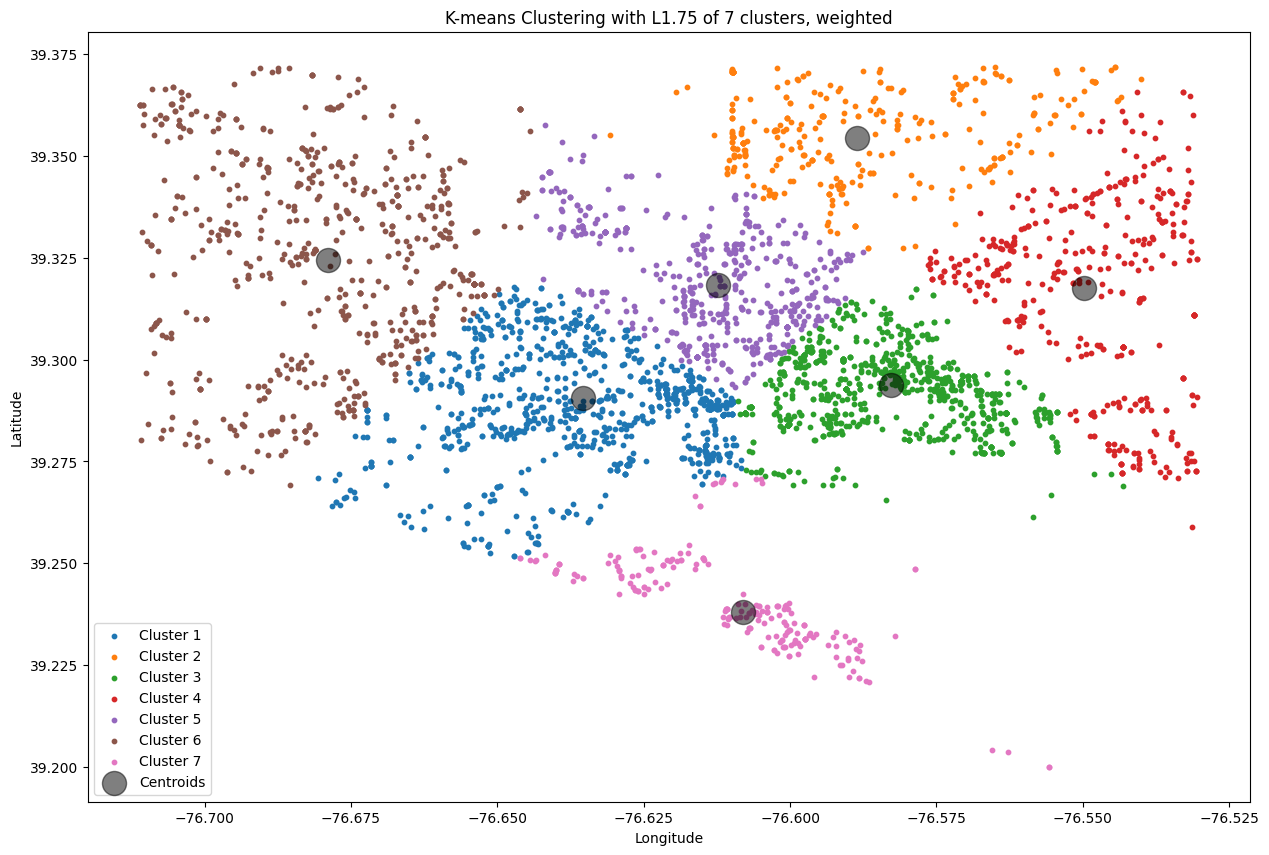

from 39.29054355414754 -76.6353987909793 to 39.27093 -76.680704
https://www.google.com/maps/dir/39.29054355414754,-76.6353987909793/39.27093,-76.680704/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.29054355414754 -76.6353987909793 to 39.31747 -76.642602
https://www.google.com/maps/dir/39.29054355414754,-76.6353987909793/39.31747,-76.642602/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.29054355414754 -76.6353987909793 to 39.289807 -76.609715
https://www.google.com/maps/dir/39.29054355414754,-76.6353987909793/39.289807,-76.609715/data=!4m11!4m10!1m0!1m3!2m2!1d-76.6233731!2d39.2996724!2m3!6e0!7e2!8j1733616000!3e0?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.35434381080277 -76.58859674560453 to 39.333229 -76.571836
https://www.google.com/maps/dir/39.35434381080277,-76.58859674560

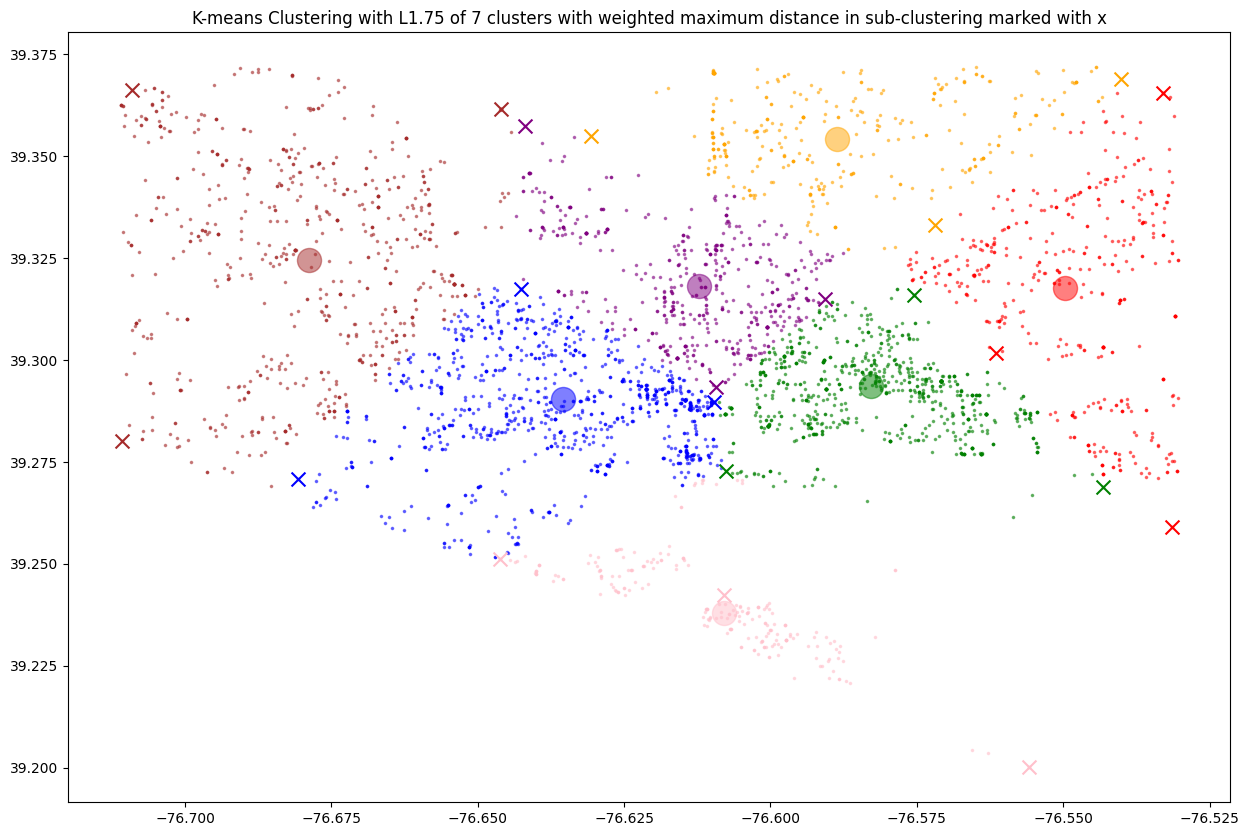

In [97]:
kmeans = KMeans(X, p=1.75, n_clusters=7)
kmeans.add_weight(Y)
kmeans.visualize()
kmeans.recluster_print()

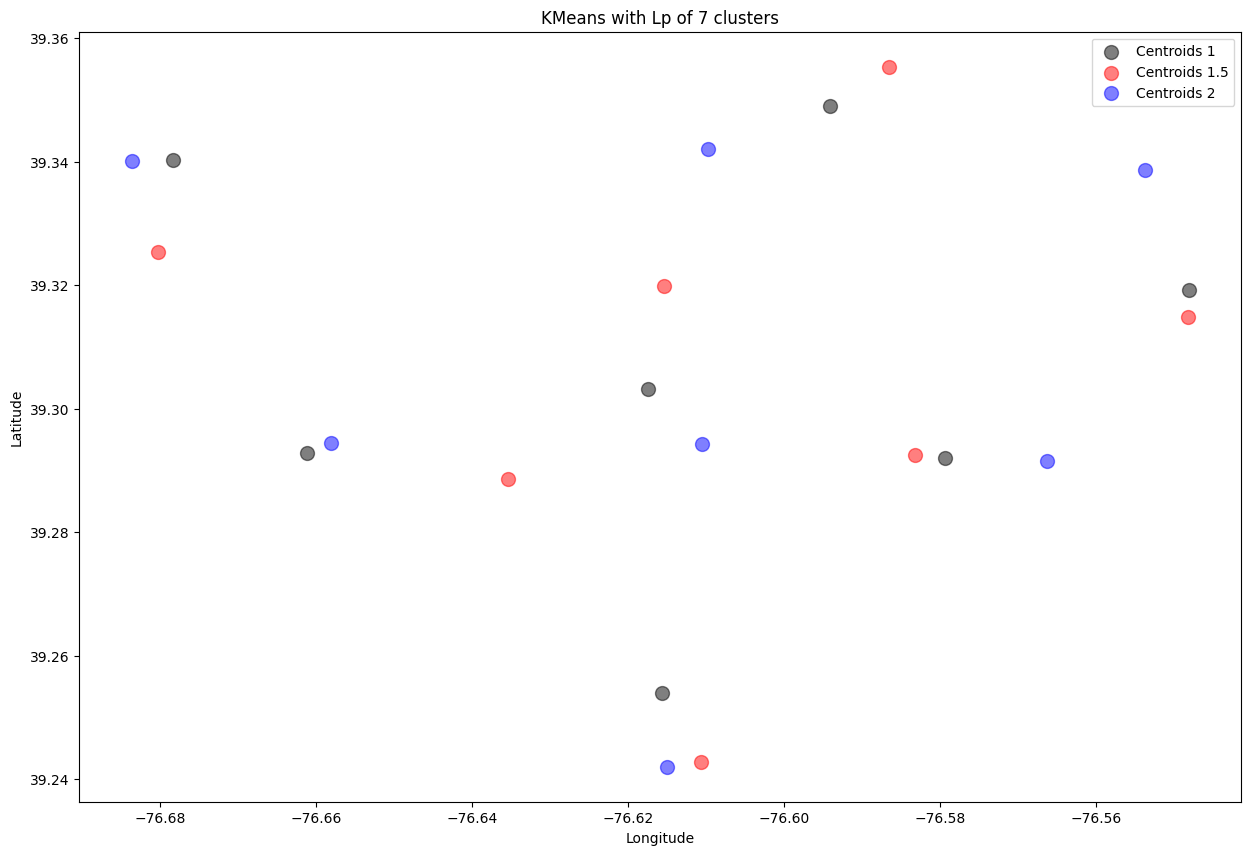

In [98]:
# Plot the comparison of coordinates of centroids of the norm p=1, 1,5, and 2 to see if norm makes a big difference
num_clusters = 7

kmeans2 = KMeans(X, p=2, n_clusters=num_clusters)
centroids2, labels2 = kmeans2.fit()

kmeans15 = KMeans(X, p=1.5, n_clusters=num_clusters)
centroids15, labels15 = kmeans15.fit()

kmeans1 = KMeans(X, p=1, n_clusters=num_clusters)
centroids1, labels1 = kmeans1.fit()

plt.figure(figsize=(15, 10))
plt.scatter(centroids1[:, 0], centroids1[:, 1], color='black', marker='o', alpha = 0.5, s=100, label='Centroids 1')
plt.scatter(centroids15[:, 0], centroids15[:, 1], color='red', marker='o', alpha = 0.5, s=100, label='Centroids 1.5')
plt.scatter(centroids2[:, 0], centroids2[:, 1], color='blue', marker='o', alpha = 0.5, s=100, label='Centroids 2')

title_string = "KMeans" + ' with ' + f"Lp of " + "7" + ' clusters'
plt.title(title_string)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
# As the plot shows, different norms indeed change the centroids at a visible scale

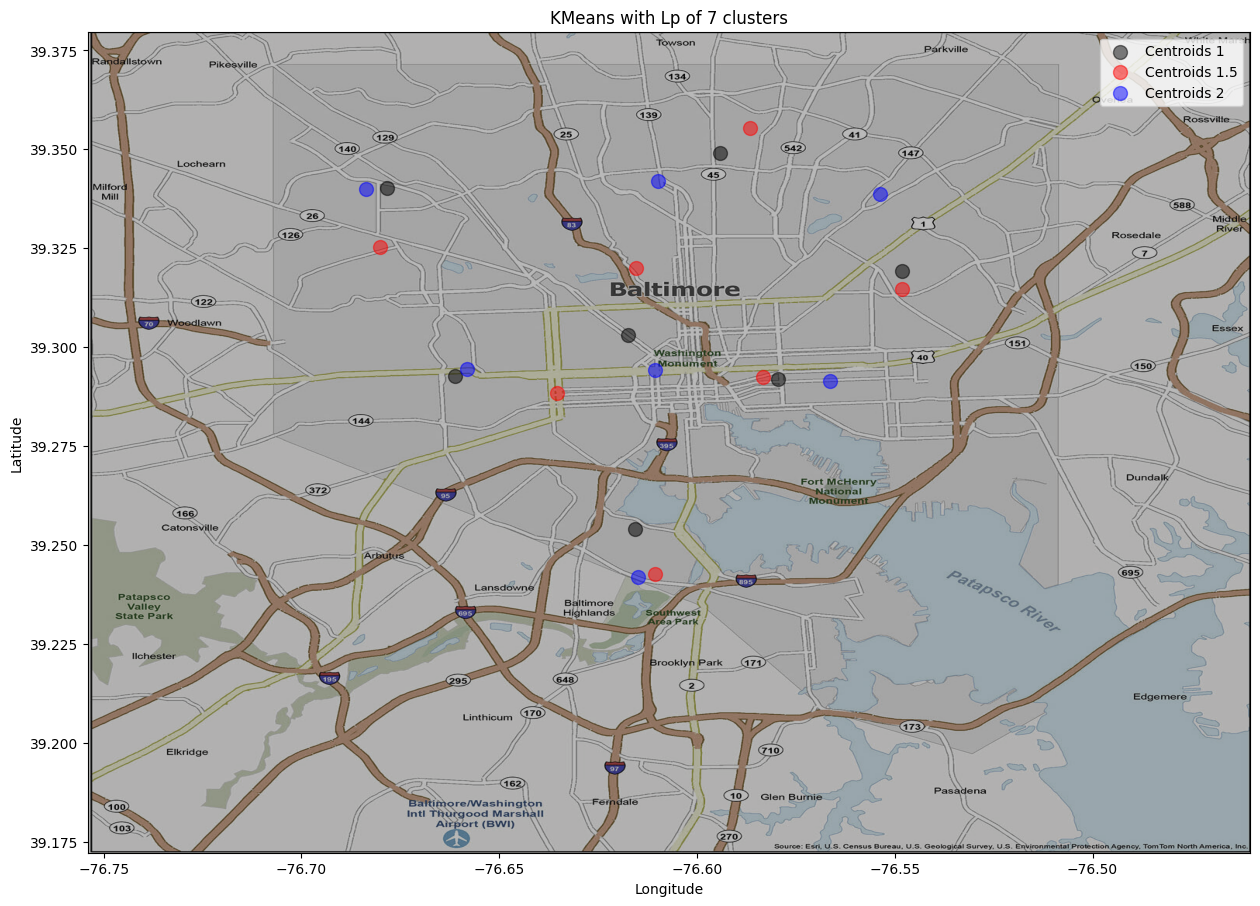

In [99]:
# Plot the comparison of coordinates of centroids of the norm p=1, 1,5, and 2 to see if norm makes a big difference
num_clusters = 7

kmeans2 = KMeans(X, p=2, n_clusters=num_clusters)
centroids2, labels2 = kmeans2.fit()

kmeans15 = KMeans(X, p=1.5, n_clusters=num_clusters)
centroids15, labels15 = kmeans15.fit()

kmeans1 = KMeans(X, p=1, n_clusters=num_clusters)
centroids1, labels1 = kmeans1.fit()

img = plt.imread("Baltimore-Map-Maryland.png")

plt.figure(figsize=(15, 30))

plt.imshow(img, extent=[-76.754053, -76.460168, 39.172181, 39.379746])

plt.scatter(centroids1[:, 0], centroids1[:, 1], color='black', marker='o', alpha = 0.5, s=100, label='Centroids 1')
plt.scatter(centroids15[:, 0], centroids15[:, 1], color='red', marker='o', alpha = 0.5, s=100, label='Centroids 1.5')
plt.scatter(centroids2[:, 0], centroids2[:, 1], color='blue', marker='o', alpha = 0.5, s=100, label='Centroids 2')

title_string = "KMeans" + ' with ' + f"Lp of " + "7" + ' clusters'
plt.title(title_string)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()
# As the plot shows, different norms indeed change the centroids at a visible scale

In [100]:
# This function takes np.array of coordinates as input, and assign each x a closest centroid in euclidean distance
def cluster_centroid(centroids, X):
    distance = np.zeros((X.shape[0], centroids.shape[0]))
    for i in range(X.shape[0]):
        for j in range(centroids.shape[0]):
            distance[i,j] = np.linalg.norm(X[i,:] - centroids[j,:])
    assignment = np.zeros(X.shape)
    for i in range(X.shape[0]):
        assignment[i,:] = centroids[np.argmin(distance[i, :]),:]
    return assignment

In [101]:
kmeans = KMeans(X, p=1.5, n_clusters=7)
kmeans.add_weight(Y)
centroids, labels=kmeans.fit()
test_X = np.array([[-76.62208, 39.32605],
     [-76.59343, 39.28923]])
assignment = cluster_centroid(centroids, test_X)
print(assignment)

[[-76.60833024  39.34230672]
 [-76.60946456  39.29572547]]


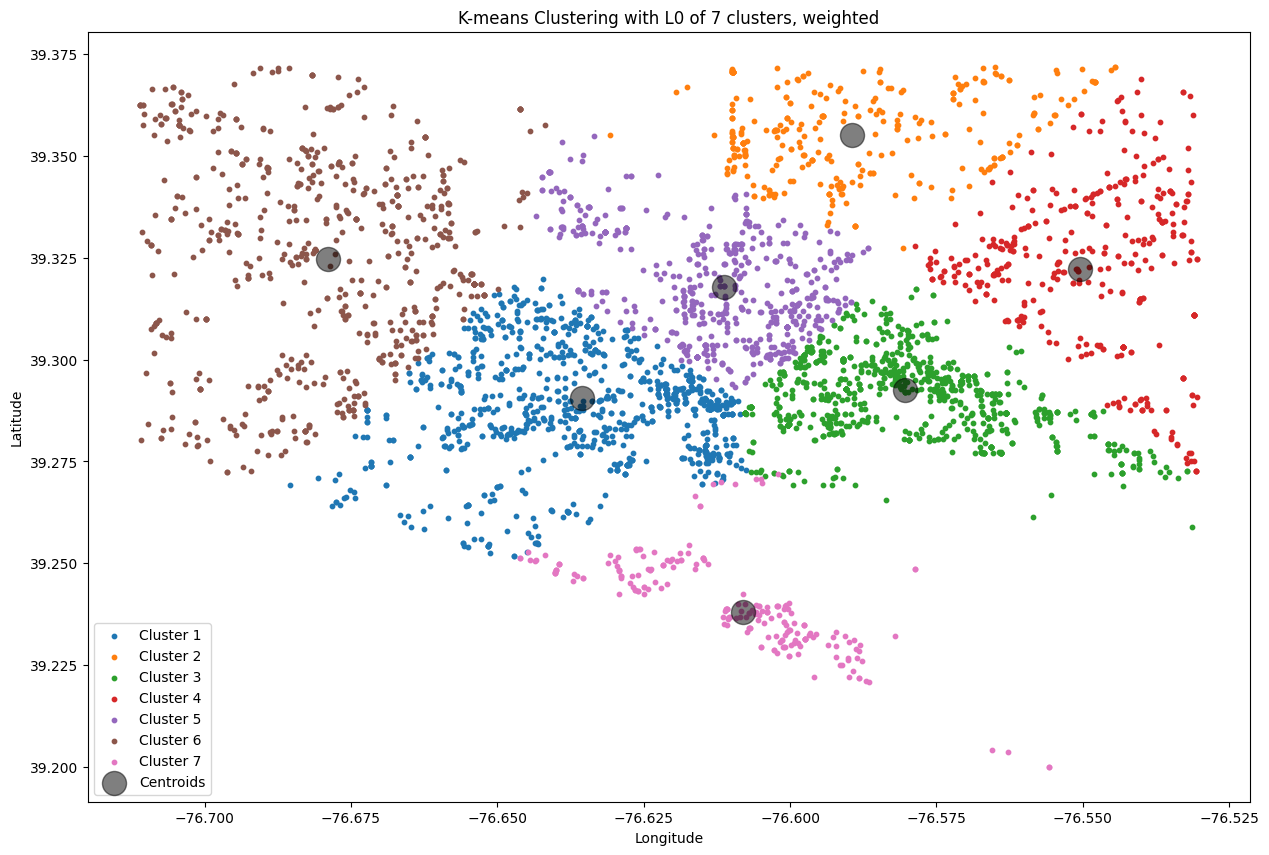

In [102]:
kmeans = KMeans(X, p=0, n_clusters=7)
kmeans.add_weight(Y)
kmeans.visualize()

Now assign the 7 centroids to newly downloaded data (Dec 2024) from Baltimore police department as testing data

In [104]:
df_test = pd.read_csv("2024_data.csv")
df_test['CrimeDateTime'] = pd.to_datetime(df_test['CrimeDateTime'], errors='coerce')
df_test = df_test[df_test.CrimeDateTime > '2024-11-06']
df_test = df_test.merge(crime_code, left_on = 'CrimeCode', right_on = 'CODE', how = 'left')
df_test = df_test.sort_values(by='CrimeDateTime', ascending=True)
df_test = df_test.dropna(subset = ["VIOLENT_CR", "Latitude", "Longitude"])
df_test = df_test[['CrimeDateTime',
 'CrimeCode',
 'Post',
 'Gender',
 'Race',
 'Latitude',
 'Longitude',
 'WEAPON',
 'VIOLENT_CR']]
df_test

<ipython-input-104-f8fdf8e7b743>:1: DtypeWarning: Columns (5,7,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv("Dec 2024 updated data.csv")


,CrimeDateTime,CrimeCode,Post,Gender,Race,Latitude,Longitude,WEAPON,VIOLENT_CR
899,2024-11-06 00:05:00,4E,916.0,M,BLACK_OR_AFRICAN_AMERICAN,39.233256,-76.592230,HANDS,COMMON ASSAULT
933,2024-11-06 00:20:00,4E,431.0,F,BLACK_OR_AFRICAN_AMERICAN,39.337376,-76.562004,HANDS,COMMON ASSAULT
455,2024-11-06 00:28:00,6C,234.0,NaN,NaN,39.310944,-76.530961,NaN,LARCENY
897,2024-11-06 00:30:00,4A,833.0,F,WHITE,39.284921,-76.638781,FIREARM,AGG. ASSAULT
855,2024-11-06 01:30:00,2A,132.0,F,BLACK_OR_AFRICAN_AMERICAN,39.285551,-76.595307,OTHER,RAPE
...,...,...,...,...,...,...,...,...,...
2315,2024-12-06 20:00:00,5A,534.0,F,WHITE,39.349739,-76.668808,NaN,BURGLARY
2319,2024-12-06 21:20:00,6F,511.0,M,BLACK_OR_AFRICAN_AMERICAN,39.331094,-76.631413,NaN,LARCENY
2263,2024-12-06 23:00:00,4E,611.0,M,BLACK_OR_AFRICAN_AMERICAN,39.318794,-76.695657,HANDS,COMMON ASSAULT
2262,2024-12-06 23:00:00,4E,715.0,F,BLACK_OR_AFRICAN_AMERICAN,39.296806,-76.633362,HANDS,COMMON ASSAULT


In [105]:
X_test = pd.DataFrame(dict(Longitude = df_test['Longitude'], Latitude = df_test['Latitude']))
X_test = X_test[X_test['Latitude'] >= 39]
X_test = X_test[X_test['Longitude'] <= -76]
X_test = X_test.to_numpy()
X_test

array([[-76.5922296 ,  39.23325625],
       [-76.562004  ,  39.337376  ],
       [-76.530961  ,  39.310944  ],
       ...,
       [-76.695657  ,  39.318794  ],
       [-76.633362  ,  39.296806  ],
       [-76.585603  ,  39.283892  ]])

In [106]:
# Reuse the weight in the training process
mapping = {
    "LARCENY": 8,
    "COMMON ASSAULT": 79,
    "AGG. ASSAULT": 122,
    "ROBBERY": 148,
    "BURGLARY": 27,
    "AUTO THEFT": 4,
    "RAPE": 248,
    "HOMICIDE": 364
}

Y = df["VIOLENT_CR"].map(mapping)
Y

,VIOLENT_CR
395653,8
395654,79
395655,122
395656,8
395657,79
...,...
400030,79
400031,122
400032,79
400033,8


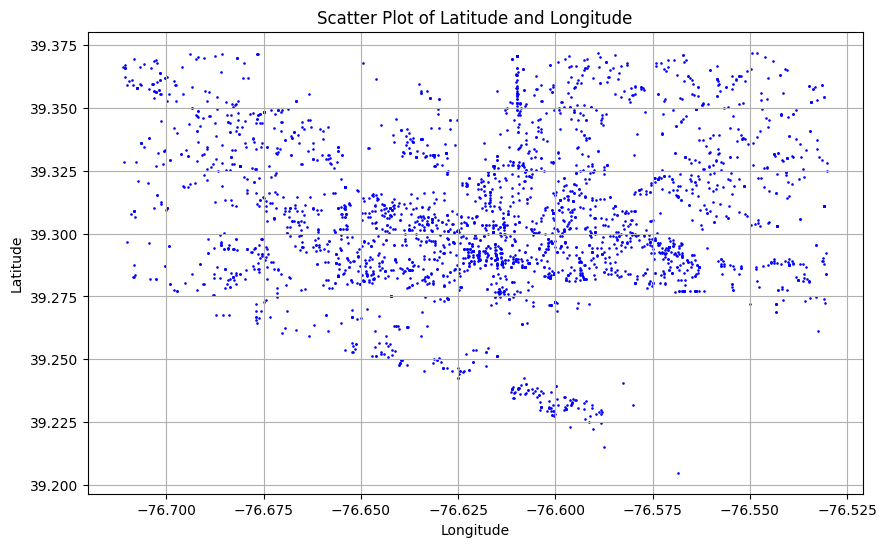

In [107]:
# Scatter plot of testing dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], color='blue', marker='.', s=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter Plot of Latitude and Longitude")
plt.grid(True)
plt.show()

In [108]:
# We randomly pick 35 crimes out of the testing crimes for verification
np.random.seed(42)
select_random_case = np.random.choice(np.arange(0, df_test.shape[0]),size=35, replace=False)
selected_crimes = df_test.iloc[select_random_case][["Longitude","Latitude"]]
selected_crimes = selected_crimes.to_numpy()

In [109]:
# As before, generate google map links by inputting sample locations and centroid locations
kmeans = KMeans(X, p=1.5, n_clusters=7)
kmeans.add_weight(Y)
centroids, labels=kmeans.fit()
assignment = cluster_centroid(centroids, selected_crimes)
for i in range(35):
    print("from", assignment[i,1], assignment[i,0], "to", selected_crimes[i,1], selected_crimes[i,0])
    print(
    f"https://www.google.com/maps/dir/{assignment[i,1]},{assignment[i,0]}/"
    f"{selected_crimes[i,1]},{selected_crimes[i,0]}/data=!3m1!4b1!4m6!4m5!2m3!6e0!7e2!8j1733270400!3e0!5m1!1e4?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D\n")

from 39.29572546576237 -76.60946455618459 to 39.309416 -76.600839
https://www.google.com/maps/dir/39.29572546576237,-76.60946455618459/39.309416,-76.600839/data=!3m1!4b1!4m6!4m5!2m3!6e0!7e2!8j1733270400!3e0!5m1!1e4?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.29572546576237 -76.60946455618459 to 39.288435 -76.61376
https://www.google.com/maps/dir/39.29572546576237,-76.60946455618459/39.288435,-76.61376/data=!3m1!4b1!4m6!4m5!2m3!6e0!7e2!8j1733270400!3e0!5m1!1e4?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.23858776196522 -76.60947709655078 to 39.22728 -76.600252
https://www.google.com/maps/dir/39.23858776196522,-76.60947709655078/39.22728,-76.600252/data=!3m1!4b1!4m6!4m5!2m3!6e0!7e2!8j1733270400!3e0!5m1!1e4?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

from 39.29572546576237 -76.60946455618459 to 39.286554 -76.596054
https://www.google.com/maps/dir/39.29572546576237,-76.60946455618459/39.286554,-76.596054/data=!3m1!4b1!4m6!4m5!2m3!6e0!7e2!8j17332704

In [110]:
# List the coordinates of current 9 police departments in the city of Baltimore for comparison
current_police_departments = np.array([[-76.61251,39.29545],
                              [-76.57339,39.31001],
                              [-76.64483,39.30066],
                              [-76.65239,39.34307],
                              [-76.58289,39.34079],
                              [-76.68539,39.34465],
                              [-76.61717,39.25291],
                              [-76.54747,39.28774],
                              [-76.66363,39.27839]])

new_assignment = cluster_centroid(current_police_departments, selected_crimes)
for i in range(35):
    print("data number:", i+1, "from", new_assignment[i,1], new_assignment[i,0], "to", selected_crimes[i,1], selected_crimes[i,0])
    print(
    f"https://www.google.com/maps/dir/{new_assignment[i,1]},{new_assignment[i,0]}/"
    f"{selected_crimes[i,1]},{selected_crimes[i,0]}/data=!3m1!4b1!4m6!4m5!2m3!6e0!7e2!8j1733270400!3e0!5m1!1e4?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D\n")

data number: 1 from 39.29545 -76.61251 to 39.309416 -76.600839
https://www.google.com/maps/dir/39.29545,-76.61251/39.309416,-76.600839/data=!3m1!4b1!4m6!4m5!2m3!6e0!7e2!8j1733270400!3e0!5m1!1e4?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

data number: 2 from 39.29545 -76.61251 to 39.288435 -76.61376
https://www.google.com/maps/dir/39.29545,-76.61251/39.288435,-76.61376/data=!3m1!4b1!4m6!4m5!2m3!6e0!7e2!8j1733270400!3e0!5m1!1e4?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

data number: 3 from 39.25291 -76.61717 to 39.22728 -76.600252
https://www.google.com/maps/dir/39.25291,-76.61717/39.22728,-76.600252/data=!3m1!4b1!4m6!4m5!2m3!6e0!7e2!8j1733270400!3e0!5m1!1e4?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

data number: 4 from 39.29545 -76.61251 to 39.286554 -76.596054
https://www.google.com/maps/dir/39.29545,-76.61251/39.286554,-76.596054/data=!3m1!4b1!4m6!4m5!2m3!6e0!7e2!8j1733270400!3e0!5m1!1e4?entry=ttu&g_ep=EgoyMDI0MTIwNC4wIKXMDSoASAFQAw%3D%3D

data number: 5 f